In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from Classes.Regression import Regression
from Classes.RegressionTeacher import RegressionTeacher
from Functions.lossFunctions import euclideError, euclideErrorGradient
from Classes.Polinomizer import Polinomizer
from Functions.gradientDescentAlgorithm import gradientDescentAlgorithm
from Functions.errorFunctions import MAE, MAPE, MSE, RMSE, R2
from Functions.regulatorFinctions import Lasso, Ridge, RidgeGrad
from scipy.linalg import orth
from sklearn.metrics import r2_score


In [291]:
def get_z(alphas: np.array, s: np.array, e=1e-6):
  z = []
  for j in range(alphas.shape[0]):
    if abs(alphas[j]) < e:
      z.append(s[j])
    else:
      z.append(sum(s[j:s.shape[0]] * alphas[j:s.shape[0]]))
  return np.array(z)


In [292]:
def Rozenbrok(x_t: np.array,
              s: np.array,
              f: callable,
              stop_def: callable,
              opt_def: callable,
              n_steps=1000):
  x = np.array(x_t, copy=True)
  alphas = np.zeros(x.shape[0])
  for _ in range(n_steps):
    print(_)
    for i in range(s.shape[0]):
      # print(i)
      alphas[i] = opt_def(x, s[i], f)
      x += np.dot(s, alphas)
    s = orth(get_z(alphas, s))
    if stop_def(x, f, alphas, s):
      print('stop')
      return x
  return x


In [293]:
models = pd.read_csv('../Data/DataLaba1/energy_task_moded.csv')
model = models.drop('year', axis=1)
model = (model-model.mean())/model.std()
model


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,time
0,-0.367666,3.301180,-1.118616,1.843774,-0.520398,1.077616,-1.235032,1.686087,-0.908194,1.510576,...,0.958043,-0.154025,-2.983203,0.824355,1.207663,2.092365,0.366845,-0.584529,-1.567533,0.738423
1,-0.367666,3.301180,-1.118616,1.616766,-0.520398,1.060983,-1.235032,1.704523,-0.908194,1.608892,...,0.965270,-0.176708,-2.969656,0.824355,1.071676,1.767230,0.343008,-0.584529,-1.567533,0.762352
2,-0.465204,3.301180,-1.118616,1.517921,-0.520398,1.037367,-1.235032,1.748563,-0.944091,1.585227,...,0.950816,-0.197500,-2.956109,0.824355,0.935690,1.442094,0.319172,-0.584529,-1.567533,0.786280
3,-0.465204,4.561263,-1.118616,1.459284,-0.520398,1.028332,-1.235032,1.769047,-0.962039,1.546747,...,0.926726,-0.220182,-2.942562,0.824355,0.799703,1.116958,0.295335,-0.584529,-1.567533,0.810209
4,-0.367666,4.561263,-1.118616,1.526298,-0.520398,1.013546,-1.235032,1.769047,-0.962039,1.502111,...,0.926726,-0.242865,-2.929015,0.824355,0.663716,0.791822,0.271499,-0.584529,-1.567533,0.834138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.022483,-0.479068,2.415901,1.583259,2.530254,0.396436,2.458683,0.590195,1.881979,1.515963,...,1.261577,2.889209,-0.043505,-1.620295,-0.288190,-1.243811,2.273765,1.297945,1.422032,0.786280
19731,-0.075055,-0.479068,2.374391,1.568181,2.468238,0.409813,2.425451,0.608630,1.881979,1.515963,...,1.261577,2.870307,-0.043505,-1.597867,-0.220197,-1.173129,2.273765,1.297945,1.422032,0.810209
19732,1.680617,0.781015,2.374391,1.592473,2.411042,0.579492,2.383911,0.752018,1.881979,1.548286,...,1.261577,2.851405,-0.043505,-1.575439,-0.152204,-1.102447,2.273765,1.297945,1.422032,0.834138
19733,3.143676,0.781015,2.374391,1.691318,2.313197,0.645392,2.304155,0.629114,1.881979,1.562139,...,1.268202,2.813601,-0.043505,-1.553011,-0.084210,-1.031766,2.249928,1.297945,1.422032,0.858067


In [294]:
X_train, X_test, y_train, y_test = train_test_split(models.drop(
    'Appliances', axis=1), models['Appliances'], test_size=0.25)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    model.drop('Appliances', axis=1), model['Appliances'], test_size=0.5)


In [295]:
def search_way_min(x: np.array, s: np.array, f: callable, step: float = 0.0000001, n_step=1000000):
  alpha = 0
  way = (-1)**int(f(x) < f(x + (alpha + step) * s))
  for _ in range(n_step):
    if f(x) > f(x + (alpha + way * step) * s):
      return alpha
    alpha += way * step
  return alpha


In [308]:
def function_optimizer_error(td, cd, w): 
    return Rozenbrok(x_t=w, s=np.eye(max(w.shape)), f=lambda a: euclideError(td, cd, a) + 100*sum(td.sum(axis=1)), opt_def=lambda x, s, f: search_way_min(x, s, f, step=1e-10, n_step=int(50)), stop_def=lambda x, f, alphas, s: np.all(abs(alphas) < 1e-9), n_steps=int(1e10))


regressor = Regression()
trainer = RegressionTeacher(regressor, function_optimizer_error)
trainer.teach(np.array(X_train, dtype=np.float64),
              np.array(y_train, dtype=np.float64))

y_predicted = regressor.predict(X_test)

my_line_regression_classic_errors = {'MAE': MAE(y_predicted, y_test),
                                     'R^2': R2(y_predicted, np.array(y_test)),
                                     'R^2_2': R2(np.array(y_test), y_predicted),
                                     'r^2_2': r2_score(np.array(y_test), y_predicted),
                                     'r^2': r2_score(y_predicted, np.array(y_test)),
                                     'RMSE': RMSE(y_predicted, y_test),
                                     'MSE': MSE(y_predicted, y_test),
                                     'MAPE': MAPE(y_predicted, y_test),
                                     }

print(my_line_regression_classic_errors)
print(y_predicted.tolist())


0
stop
{'MAE': 2006.8247943074805, 'R^2': -330767.7324905352, 'R^2_2': -27265.30057196549, 'r^2_2': -392.2490357221112, 'r^2': -31.416747275051144, 'RMSE': 2037.1732456114187, 'MSE': 4150074.832634961, 'MAPE': 31.652202763308747}
[2701.9440073017295, 1687.276044115581, 1823.7286981037491, 1737.8942458496433, 2458.0633629187096, 1945.1901441226162, 2273.0773878421296, 2488.6794784033027, 2630.9013478612214, 1860.228263169035, 2103.659001280866, 1946.3142875169674, 2489.910984919158, 2495.9076520852523, 1730.6470160441359, 2729.2265384384245, 1809.290221527801, 1973.6977337326475, 1581.7416270096353, 2191.0520006697993, 2636.6171022687085, 2730.0108148632007, 2758.2556432104197, 2442.809140078185, 1756.356901718186, 2084.677719647236, 1939.226595427448, 2069.658333576474, 2771.399163445358, 2655.500430509903, 2149.3647290057365, 1702.3845064848138, 2563.831732826253, 2308.792895651423, 2177.962239516716, 2039.1094480378013, 2536.2350994738745, 2095.514779437508, 1551.7166184296464, 1876.

In [361]:
np.argsort(abs(regressor.weights))


array([16,  5,  8,  3, 25, 13, 24,  1, 27,  6,  7, 10, 15,  9, 26, 23,  2,
       20, 14, 22,  0, 19, 12,  4, 28, 18, 17, 21, 11], dtype=int64)

In [360]:
model.columns[np.argsort(abs(regressor.weights))]


Index(['T8', 'RH_2', 'T4', 'RH_1', 'Tdewpoint', 'RH_6', 'Visibility', 'lights',
       'month', 'T3', 'RH_3', 'T5', 'RH_7', 'RH_4', 'day', 'Windspeed', 'T1',
       'T_out', 'T7', 'RH_out', 'Appliances', 'RH_9', 'T6', 'T2', 'time', 'T9',
       'RH_8', 'Press_mm_hg', 'RH_5'],
      dtype='object')

In [351]:
a = 90
my_line_regession_classic_errors = {'MAE': MAE(y_predicted, y_test),
                                     'R^2': R2(y_predicted, np.array(y_test)),
                                     'R^2_2': R2(np.array(y_test), y_predicted),
                                     'r^2_2': r2_score(np.array(y_test), y_predicted/a),
                                     'r^2': r2_score(y_predicted/a, np.array(y_test)),
                                     'RMSE': RMSE(y_predicted, y_test),
                                     'MSE': MSE(y_predicted, y_test),
                                     'MAPE': MAPE(y_predicted, y_test),
                                     }

print(my_line_regression_classic_errors)


{'MAE': 2006.8247943074805, 'R^2': -330767.7324905352, 'R^2_2': -27265.30057196549, 'r^2_2': 0.04335458884417687, 'r^2': -33.77693878774241, 'RMSE': 2037.1732456114187, 'MSE': 4150074.832634961, 'MAPE': 31.652202763308747}


In [352]:
y_all = regressor.predict(np.append(X_test.to_numpy(), X_train.to_numpy(), axis=0))


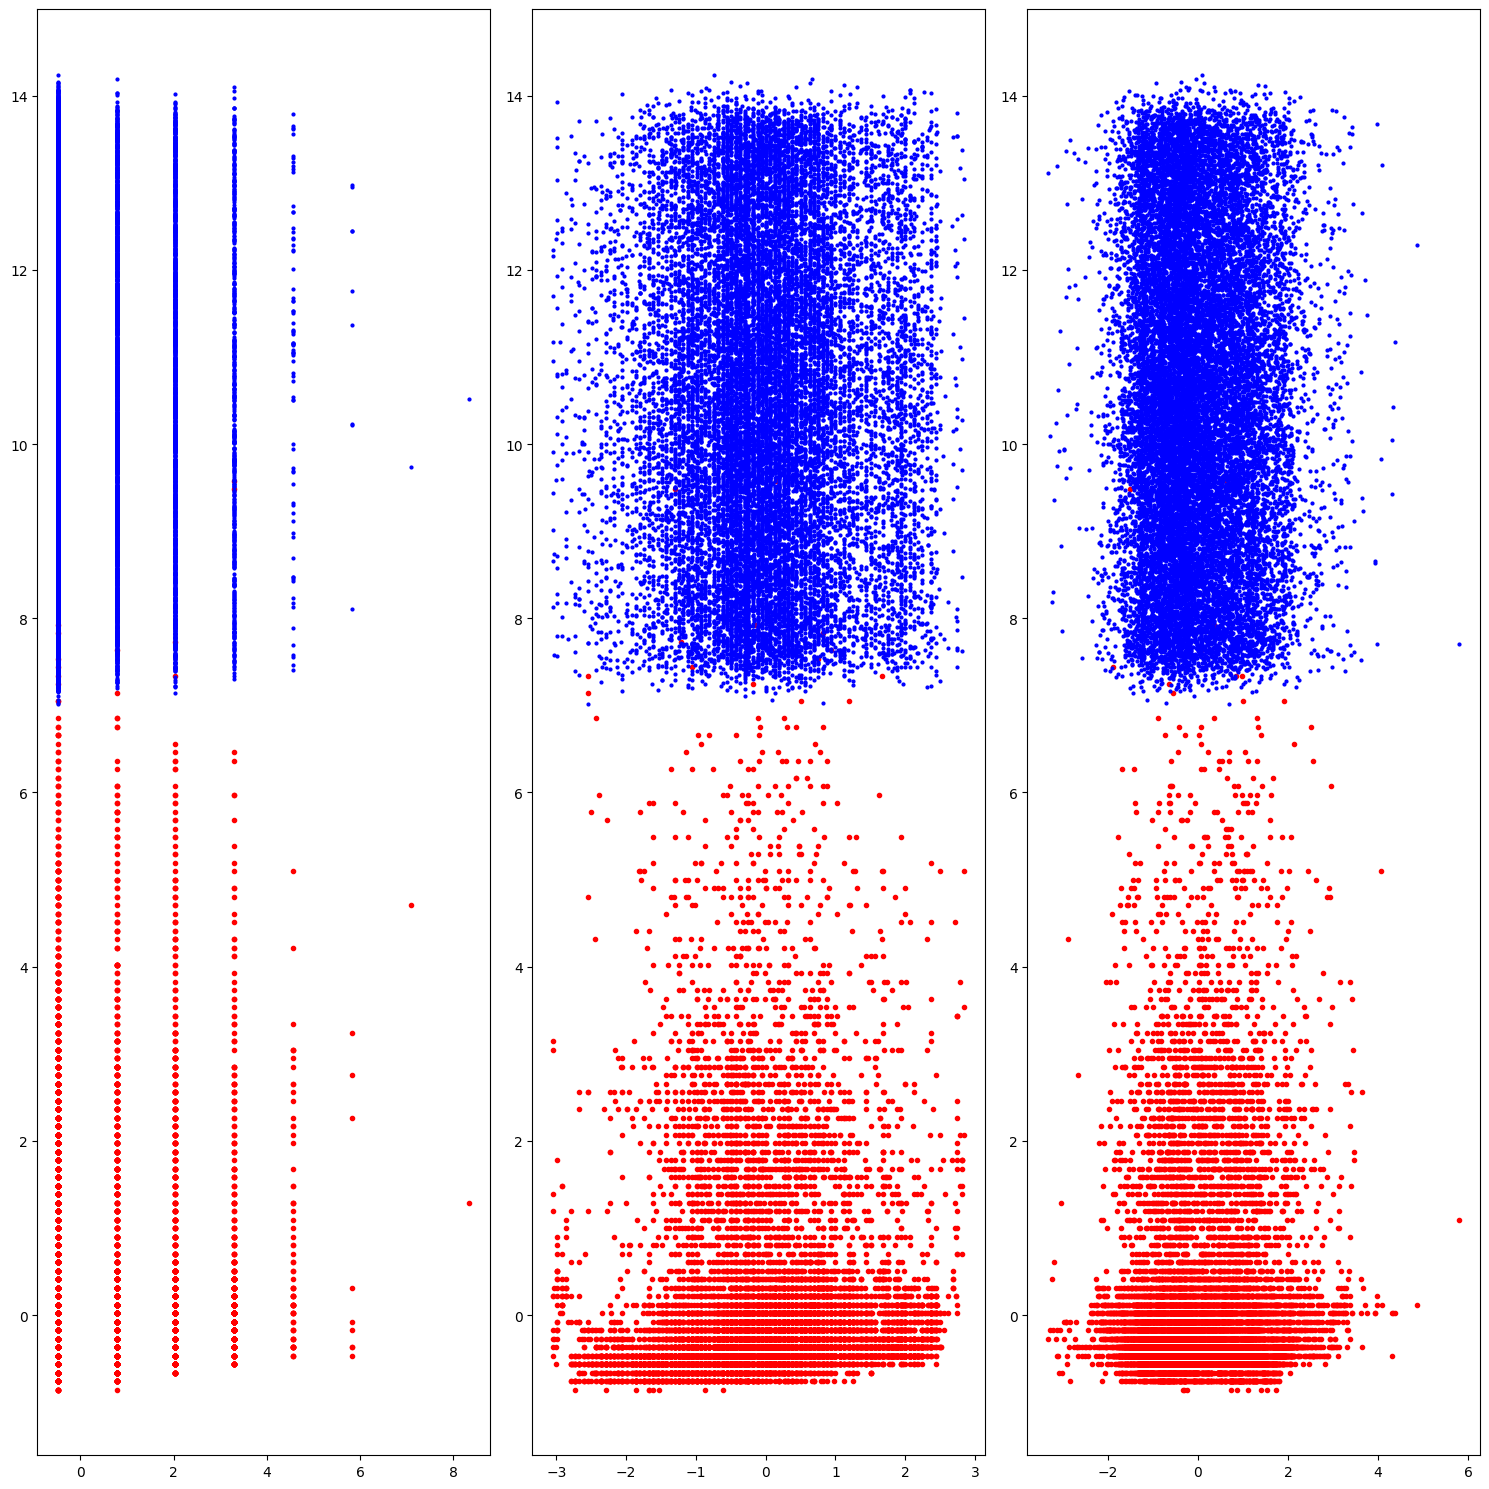

In [355]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = model.drop('Appliances', axis=1).columns[0:3]
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z = 0
k = 0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(model[i], model['Appliances'], 'ro', markersize=3)
  ax.plot(model[i], y_all/200, 'bo', markersize=2)
  k += 1
  z += (k % 3) // 2
